<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/ARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##needs stationary models

In [ ]:
#https://stats.stackexchange.com/questions/129052/acf-and-pacf-formula
##for correlation and autocorrelation math/reason behind it
#https://youtu.be/Icl9_46_RZY
##for diffnt ARIMA models and when to use and what is p,d,q
##p is order of AR part and q is order of MA part
##instead of doing difference operations successively why not do the d>1 operations on the original dataframe - otherwise we will miss out on more datapointd - or maybe not lol
##p comes out from pacf plot
##q comes from the acf plot 
##p and q refer to the index of the last most statistically significant term// other than delay = 0

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity
    
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary
    
    Parameters
    ----------
    x : pd.Series / np.array
    The time series to be checked for stationarity
    
    Returns
    -------
    results: pd.DataFrame
    A DataFrame with the ADF test's results
    '''
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value
    
    return results

In [ ]:
df = yf.download(tickers = 'AAPL', start = '2010-09-09', end = '2017-09-09')
df = df.loc[:,['Adj Close']]
df.rename(columns = {'Adj Close': 'price'}, inplace = True)
df

[*********************100%***********************]  1 of 1 completed


,price
Date,
2010-09-09,35.831242
2010-09-10,35.877548
2010-09-13,36.371960
2010-09-14,36.510902
2010-09-15,36.805088
...,...
2017-09-01,160.591751
2017-09-05,158.663330
2017-09-06,158.496887


In [ ]:
##try modelling aapl prices like so 

In [ ]:
adf_test(df['price'])
##takes a series
##not stationary

Test Statistic              -0.371353
p-value                      0.914773
# of Lags Used               0.000000
# of Observations Used    1762.000000
Critical Value (1%)         -3.434067
Critical Value (5%)         -2.863182
Critical Value (10%)        -2.567644
dtype: float64

In [ ]:
df['diff'] = df.price - df.price.shift(1)
df.dropna(inplace = True)
df

,price,diff
Date,,
2010-09-10,35.877548,0.046307
2010-09-13,36.371960,0.494411
2010-09-14,36.510902,0.138943
2010-09-15,36.805088,0.294186
2010-09-16,37.669987,0.864899
...,...,...
2017-09-01,160.591751,0.048904
2017-09-05,158.663330,-1.928421
2017-09-06,158.496887,-0.166443


In [ ]:
adf_test(df['diff'])
##defo stationary

Test Statistic             -41.306911
p-value                      0.000000
# of Lags Used               0.000000
# of Observations Used    1761.000000
Critical Value (1%)         -3.434069
Critical Value (5%)         -2.863183
Critical Value (10%)        -2.567645
dtype: float64

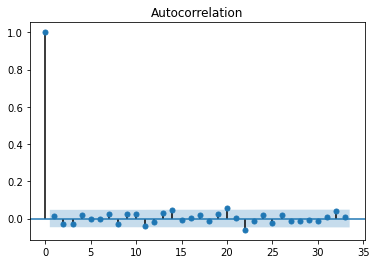

In [ ]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(df['diff'])
##no 

In [ ]:
n = int(0.8*len(df))
df_train = df[:n]
df_test = df[n:]

In [ ]:
df_train

,price,diff
Date,,
2010-09-10,35.877548,0.046307
2010-09-13,36.371960,0.494411
2010-09-14,36.510902,0.138943
2010-09-15,36.805088,0.294186
2010-09-16,37.669987,0.864899
...,...,...
2016-04-11,105.953430,0.349846
2016-04-12,107.333488,1.380058
2016-04-13,108.888489,1.555000


In [ ]:
df_test

,price,diff
Date,,
2016-04-18,104.456757,-2.303329
2016-04-19,103.902794,-0.553963
2016-04-20,104.116592,0.213799
2016-04-21,102.989235,-1.127357
2016-04-22,102.707397,-0.281837
...,...,...
2017-09-01,160.591751,0.048904
2017-09-05,158.663330,-1.928421
2017-09-06,158.496887,-0.166443


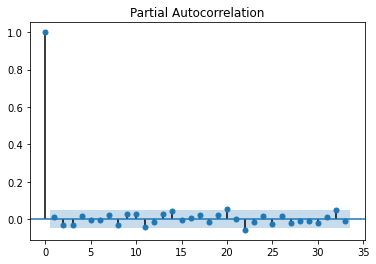

In [ ]:
pacf = smt.graphics.plot_pacf(df['diff'])

In [ ]:
##p,q,d  = 0,0,1


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(df_train['diff'],order = (0,1,0))
result = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
m2 = ARIMA(df_train['diff'], order = (0,1,0)).fit()
m2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.diff   No. Observations:                 1408
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2907.297
Method:                           css   S.D. of innovations              1.908
Date:                Sun, 12 Dec 2021   AIC                           5818.595
Time:                        12:54:35   BIC                           5829.095
Sample:                             1   HQIC                          5822.519
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.051     -0.031      0.975      -0.101       0.098
==============================================================================
"""

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.diff   No. Observations:                 1408
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2907.297
Method:                           css   S.D. of innovations              1.908
Date:                Sun, 12 Dec 2021   AIC                           5818.595
Time:                        12:54:35   BIC                           5829.095
Sample:                             1   HQIC                          5822.519
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.051     -0.031      0.975      -0.101       0.098
==============================================================================
"""

In [ ]:
##p comes out from pacf plot
##q comes from the acf plot 
##p and q refer to the index of the last most statistically significant term// other than delay = 0

In [ ]:
a,b,c = result.forecast(len(df_test))

In [ ]:
print(a)


[-2.18830012 -2.18988608 -2.19147203 -2.19305798 -2.19464393 -2.19622989
 -2.19781584 -2.19940179 -2.20098774 -2.20257369 -2.20415965 -2.2057456
 -2.20733155 -2.2089175  -2.21050346 -2.21208941 -2.21367536 -2.21526131
 -2.21684727 -2.21843322 -2.22001917 -2.22160512 -2.22319107 -2.22477703
 -2.22636298 -2.22794893 -2.22953488 -2.23112084 -2.23270679 -2.23429274
 -2.23587869 -2.23746464 -2.2390506  -2.24063655 -2.2422225  -2.24380845
 -2.24539441 -2.24698036 -2.24856631 -2.25015226 -2.25173822 -2.25332417
 -2.25491012 -2.25649607 -2.25808202 -2.25966798 -2.26125393 -2.26283988
 -2.26442583 -2.26601179 -2.26759774 -2.26918369 -2.27076964 -2.27235559
 -2.27394155 -2.2755275  -2.27711345 -2.2786994  -2.28028536 -2.28187131
 -2.28345726 -2.28504321 -2.28662916 -2.28821512 -2.28980107 -2.29138702
 -2.29297297 -2.29455893 -2.29614488 -2.29773083 -2.29931678 -2.30090274
 -2.30248869 -2.30407464 -2.30566059 -2.30724654 -2.3088325  -2.31041845
 -2.3120044  -2.31359035 -2.31517631 -2.31676226 -2.

In [ ]:
print(b)

[ 1.90770961  2.69790881  3.30424998  3.81541923  4.26576838  4.67291513
  5.04732521  5.39581762  5.72312884  6.03270749  6.327157    6.60849995
  6.87834483  7.13799577  7.38852756  7.63083845  7.86568824  8.09372642
  8.31551342  8.53153675  8.74222371  8.94795123  9.1490539   9.34583026
  9.53854807  9.72744854  9.91274993 10.09465042 10.27333067 10.44895588
 10.6216776  10.79163523 10.95895738 11.12376298 11.28616227 11.44625768
 11.60414455 11.75991185 11.91364271 12.06541498 12.21530166 12.36337133
 12.50968851 12.65431399 12.79730513 12.93871611 13.07859818 13.2169999
 13.35396729 13.48954404 13.62377166 13.75668966 13.88833562 14.01874539
 14.14795315 14.27599153 14.40289173 14.52868356 14.65339558 14.77705512
 14.89968839 15.02132051 15.14197563 15.2616769  15.38044661 15.49830616
 15.61527617 15.73137647 15.8466262  15.96104375 16.07464692 16.18745285
 16.29947808 16.41073861 16.52124988 16.63102683 16.74008392 16.8484351
 16.95609393 17.0630735  17.16938652 17.27504528 17.3

In [ ]:
print(c)

[[ -5.92734226   1.55074201]
 [ -7.47769017   3.09791802]
 [ -8.66768298   4.28473892]
 [ -9.67114225   5.28502629]
 [-10.55539632   6.16610845]
 [-11.35497524   6.96251547]
 [-12.09039147   7.69475979]
 [-12.77500998   8.3762064 ]
 [-13.41811415   9.01613866]
 [-14.02646311   9.62131572]
 [-14.60515948  10.19684019]
 [-15.1581675   10.7466763 ]
 [-15.68863969  11.27397659]
 [-16.19913213  11.78129712]
 [-16.69175137  12.27074446]
 [-17.16825795  12.74407913]
 [-17.63014102  13.2027903 ]
 [-18.0786736   13.64815098]
 [-18.51495408  14.08125954]
 [-18.93993798  14.50307155]
 [-19.35446278  14.91442444]
 [-19.75926728  15.31605703]
 [-20.15500721  15.70862506]
 [-20.54226774  16.09271369]
 [-20.92157365  16.46884769]
 [-21.29339774  16.83749987]
 [-21.65816773  17.19909796]
 [-22.01627209  17.55403042]
 [-22.3680649   17.90265133]
 [-22.71386995  18.24528447]
 [-23.05398424  18.58222686]
 [-23.38868103  18.91375174]
 [-23.71821238  19.24011118]
 [-24.04281137  19.56153827]
 [-24.36269408

In [ ]:
a = pd.DataFrame(a)
a.rename(columns = {0:'a_col'},inplace= True)
a

,a_col
0,-2.188300
1,-2.189886
2,-2.191472
3,-2.193058
4,-2.194644
...,...
348,-2.740212
349,-2.741797
350,-2.743383
351,-2.744969


In [ ]:
b.shape
a['b_col'] = b
a

,a_col,b_col
0,-2.188300,1.907710
1,-2.189886,2.697909
2,-2.191472,3.304250
3,-2.193058,3.815419
4,-2.194644,4.265768
...,...,...
348,-2.740212,35.638957
349,-2.741797,35.689979
350,-2.743383,35.740928
351,-2.744969,35.791805


In [ ]:
c.shape
c
a['lower_c'] = c[:,0]
a['upper_c'] = c[:,1]
a['index'] = df_test.index
a.set_index(a['index'], inplace = True)
a

,a_col,b_col,lower_c,upper_c,index
index,,,,,
2016-04-18,-2.188300,1.907710,-5.927342,1.550742,2016-04-18
2016-04-19,-2.189886,2.697909,-7.477690,3.097918,2016-04-19
2016-04-20,-2.191472,3.304250,-8.667683,4.284739,2016-04-20
2016-04-21,-2.193058,3.815419,-9.671142,5.285026,2016-04-21
2016-04-22,-2.194644,4.265768,-10.555396,6.166108,2016-04-22
...,...,...,...,...,...
2017-09-01,-2.740212,35.638957,-72.591283,67.110860,2017-09-01
2017-09-05,-2.741797,35.689979,-72.692871,67.209276,2017-09-05
2017-09-06,-2.743383,35.740928,-72.794315,67.307549,2017-09-06


In [ ]:
a.drop(['index'],axis = 1, inplace = True)
a

,a_col,b_col,lower_c,upper_c
index,,,,
2016-04-18,-2.188300,1.907710,-5.927342,1.550742
2016-04-19,-2.189886,2.697909,-7.477690,3.097918
2016-04-20,-2.191472,3.304250,-8.667683,4.284739
2016-04-21,-2.193058,3.815419,-9.671142,5.285026
2016-04-22,-2.194644,4.265768,-10.555396,6.166108
...,...,...,...,...
2017-09-01,-2.740212,35.638957,-72.591283,67.110860
2017-09-05,-2.741797,35.689979,-72.692871,67.209276
2017-09-06,-2.743383,35.740928,-72.794315,67.307549


In [ ]:
type(a.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

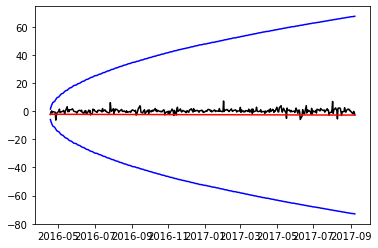

In [ ]:
plt.plot(df_test['diff'], color = 'k')
plt.plot(a['a_col'],color = 'r')
plt.plot(a['lower_c'], color = 'b')
plt.plot(a['upper_c'], color = 'b')
##what is this lolthis is pretty bad
##not recommended because this is pretty bad tbh

In [ ]:
##a = forecast
##b = standard error
##c = confidenceintervals

In [ ]:
##do check out the code for arima models given in udemy guy`s file